<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [73]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [12]:
import pandas as pd


Import matplotlib


In [7]:
import matplotlib.pyplot as plt

## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [74]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [79]:
df.head(10)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN
8,9,I code primarily as a hobby,45-54 years old,"Employed, full-time",In-person,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Written-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN


Load the data into a pandas dataframe:


In [80]:
df.shape

(65457, 114)

Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [86]:
# Task 1.1 Count the number of duplicate rows in the dataset
print('There are', df.duplicated().sum(), 'duplicate rows.')

# Task 1.2 Display the first few duplicate rows to understand their structure
first_few_duplicates = df[df.duplicated()].head(20)
print("\nFirst few duplicate rows:")
print(first_few_duplicates)

There are 20 duplicate rows.

First few duplicate rows:
       ResponseId                                         MainBranch  \
65437           1                     I am a developer by profession   
65438           2                     I am a developer by profession   
65439           3                     I am a developer by profession   
65440           4                              I am learning to code   
65441           5                     I am a developer by profession   
65442           6                        I code primarily as a hobby   
65443           7  I am not primarily a developer, but I write co...   
65444           8                              I am learning to code   
65445           9                        I code primarily as a hobby   
65446          10                     I am a developer by profession   
65447       18522                     I am a developer by profession   
65448       49767                        I code primarily as a hobby   
65449   

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [82]:
#Task 2.1 Identify duplicate rows based on selected columns 
# Identify duplicate rows based on 'MainBranch', 'Employment', and 'RemoteWork'
duplicate_rows = df[df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'])]

print("Duplicate rows based on MainBranch, Employment, and RemoteWork:")
print(duplicate_rows)

Duplicate rows based on MainBranch, Employment, and RemoteWork:
       ResponseId                                         MainBranch  \
1               2                     I am a developer by profession   
2               3                     I am a developer by profession   
14             15                     I am a developer by profession   
15             16                     I am a developer by profession   
16             17                        I code primarily as a hobby   
...           ...                                                ...   
65452       35588  I am not primarily a developer, but I write co...   
65453       50580                     I am a developer by profession   
65454        9938                     I am a developer by profession   
65455       40874                     I am a developer by profession   
65456       36796                     I am a developer by profession   

                      Age                                         Emplo

In [83]:
print(df.MainBranch.duplicated().sum())
print(df.Employment.duplicated().sum())
print(df.RemoteWork.duplicated().sum())

65452
65347
65453


In [84]:
# Task 2.2 Determine which columns frequently have identical values across these rows
# Count duplicates in each column
duplicate_counts = {}
for column in df.columns:
    # duplicated(keep=False) marks all occurrences of a duplicate as True
    # sum() then counts these True values
    duplicate_counts[column] = df[column].duplicated().sum()

print("Duplicate counts per column:")
for column, count in duplicate_counts.items():
    print(f"Column '{column}': {count} duplicates")

Duplicate counts per column:
Column 'ResponseId': 20 duplicates
Column 'MainBranch': 65452 duplicates
Column 'Age': 65449 duplicates
Column 'Employment': 65347 duplicates
Column 'RemoteWork': 65453 duplicates
Column 'Check': 65456 duplicates
Column 'CodingActivities': 65338 duplicates
Column 'EdLevel': 65448 duplicates
Column 'LearnCode': 65038 duplicates
Column 'LearnCodeOnline': 54603 duplicates
Column 'TechDoc': 65343 duplicates
Column 'YearsCode': 65404 duplicates
Column 'YearsCodePro': 65404 duplicates
Column 'DevType': 65422 duplicates
Column 'OrgSize': 65446 duplicates
Column 'PurchaseInfluence': 65453 duplicates
Column 'BuyNewTool': 65241 duplicates
Column 'BuildvsBuy': 65453 duplicates
Column 'TechEndorse': 65070 duplicates
Column 'Country': 65271 duplicates
Column 'Currency': 65314 duplicates
Column 'CompTotal': 62119 duplicates
Column 'LanguageHaveWorkedWith': 41592 duplicates
Column 'LanguageWantToWorkWith': 42687 duplicates
Column 'LanguageAdmired': 53121 duplicates
Column

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


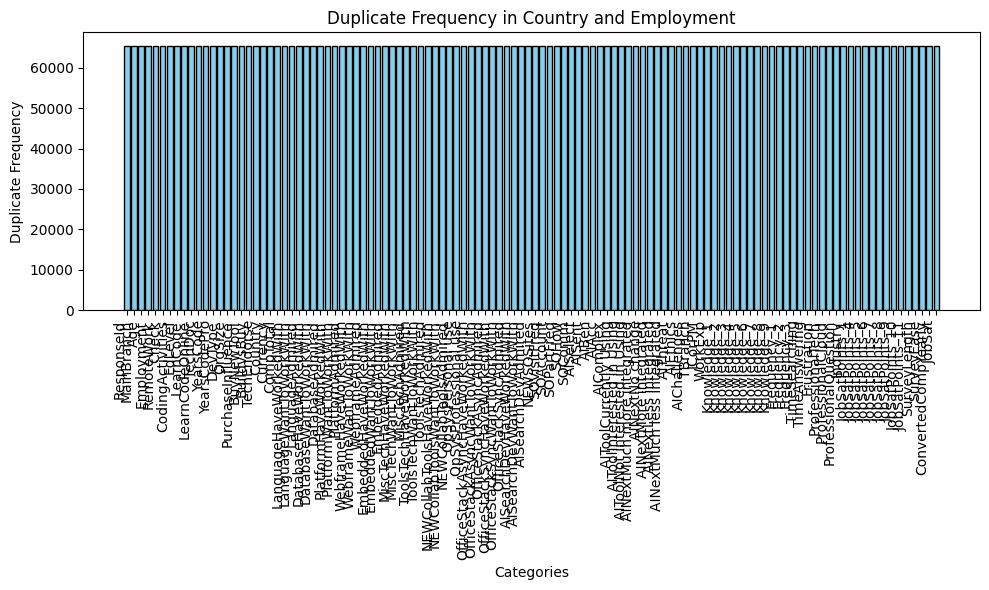

In [68]:
import matplotlib.pyplot as plt
column_list = df.columns.tolist()

plt.figure(figsize=(10, 6)) # Adjust figure size for better display
plt.bar(column_list, count, color='skyblue', edgecolor='black')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Categories')
plt.ylabel('Duplicate Frequency')
plt.title('Duplicate Frequency in Country and Employment')
plt.tight_layout()
plt.show()

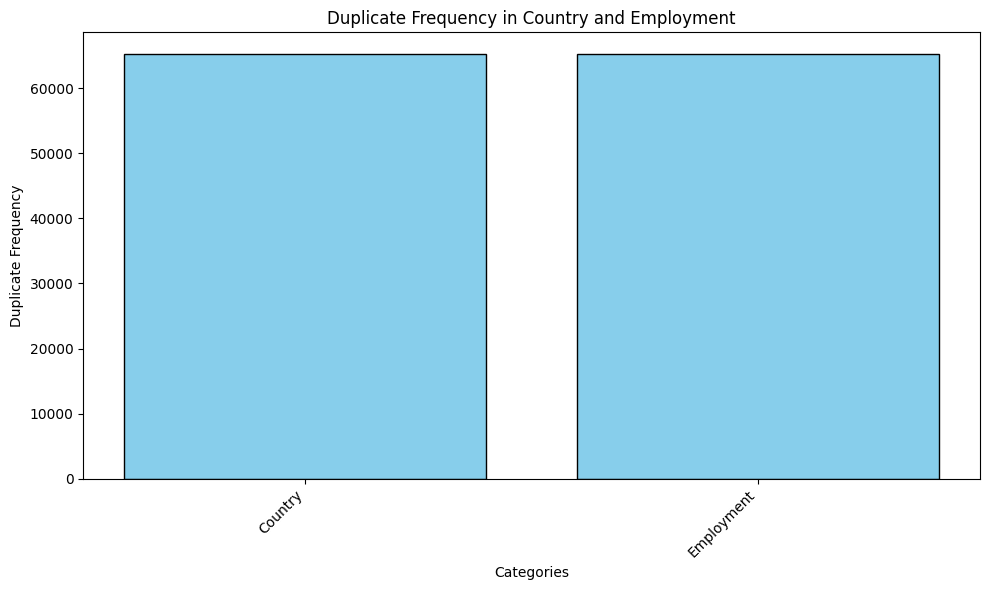

In [69]:
import matplotlib.pyplot as plt
#Task 3 
categories = ['Country','Employment']
frequency = [65271, 65347]
plt.figure(figsize=(10, 6)) # Adjust figure size for better display
plt.bar(categories, frequency, color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right') # Rotate by 45 degrees and align to the right
plt.xlabel('Categories')
plt.ylabel('Duplicate Frequency')
plt.title('Duplicate Frequency in Country and Employment')
plt.tight_layout()
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [91]:
df.drop_duplicates(inplace=True)
print('There are now', df.duplicated().sum(), 'duplicate rows.')
print('There are', df.duplicated('ResponseId').sum(), 'duplicate Respondats.')

There are now 0 duplicate rows.
There are 0 duplicate Respondats.


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
